<a href="https://colab.research.google.com/github/AryanilAD/Corporate-Training-Mini_Projects/blob/main/Performing_decision_tree_on_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Decision Tree Model on Iris dataset**

#**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#**Importing Dataset**

In [ ]:
data=pd.read_csv('/content/iris.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
X = data.drop('species', axis=1)  # Features
y = data['species']  # Target

In [ ]:
# Separate features (X) and target (y)
X = data.drop('species', axis=1)  # Features
y = data['species']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
# Create a CART model
cart_model = DecisionTreeClassifier(max_depth=3,random_state=42)

# Train the model on the training data
cart_model.fit(X_train, y_train)

# Make predictions on the training and testing data
y_train_pred = cart_model.predict(X_train)
y_test_pred = cart_model.predict(X_test)

# Calculate training and testing accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Generate classification reports for training and testing data
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Generate confusion matrices for training and testing data
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print results
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

print('\nClassification Report for Training Data:')
print(train_report)

print('\nClassification Report for Testing Data:')
print(test_report)

print('\nConfusion Matrix for Training Data:')
print(train_conf_matrix)

print('\nConfusion Matrix for Testing Data:')
print(test_conf_matrix)


Training Accuracy: 0.97
Testing Accuracy: 0.98

Classification Report for Training Data:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        27
  Versicolor       0.94      0.97      0.95        31
   Virginica       0.97      0.94      0.95        32

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90


Classification Report for Testing Data:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        23
  Versicolor       0.95      1.00      0.97        19
   Virginica       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60


Confusion Matrix for Training Data:
[[27  0  0]
 [ 0 30  1]
 [ 0  2 30]]

Confusion Matrix for Testing Data

The decision tree's maximum depth is specified by the max_depth option in the DecisionTreeClassifier. The longest path from a root node to a leaf node determines a tree's depth.The maximum depth of the tree is controlled by the max_depth setting. In the event that this option is omitted, the tree is branched out until all of its leaves are either pure—that is, they only include samples from one class—or include less samples than min samples split. This may result in an extremely deep tree and overfitting.

**we can restrict the depth of the tree by specifying max_depth, which can assist reduce overfitting and enhance the model's ability to generalize to new data. Generally, a simpler model with less variance but maybe more bias has a smaller max_depth.**



**max_depth=3 limits the depth of the decision tree to 3 levels from the root to the deepest leaf.**

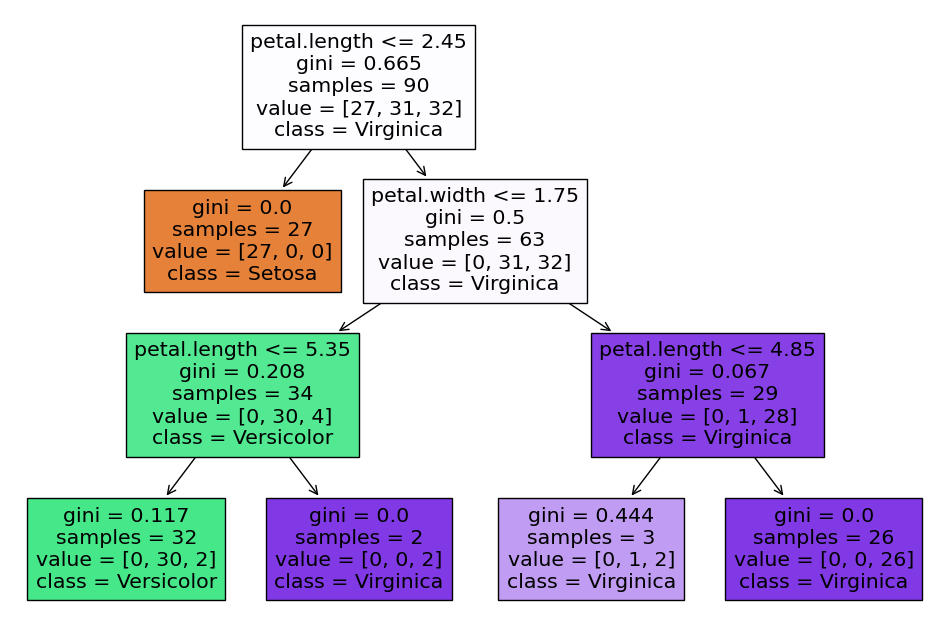

In [ ]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(cart_model, feature_names=X.columns, class_names=data['species'].unique(), filled=True)
plt.show()

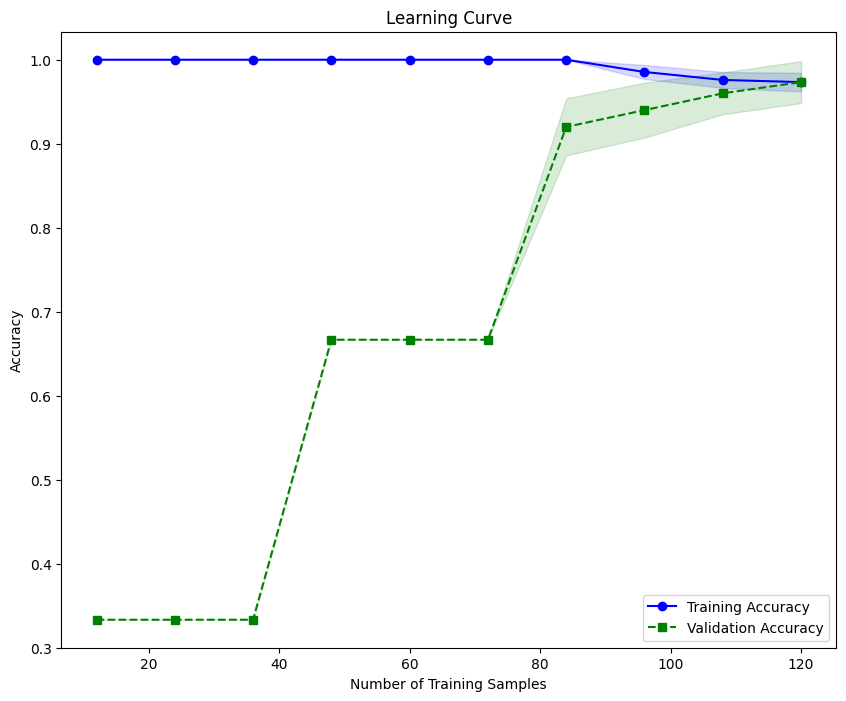

In [ ]:
from sklearn.model_selection import learning_curve

# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(cart_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 8))
plt.plot(train_sizes, train_mean, color='blue', marker='o', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


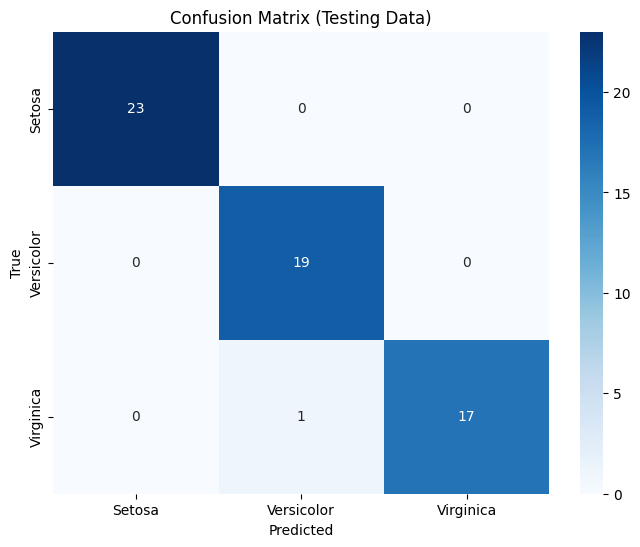

In [ ]:
import seaborn as sns

# Visualize the confusion matrix for the testing data
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=data['species'].unique(), yticklabels=data['species'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Testing Data)')
plt.show()

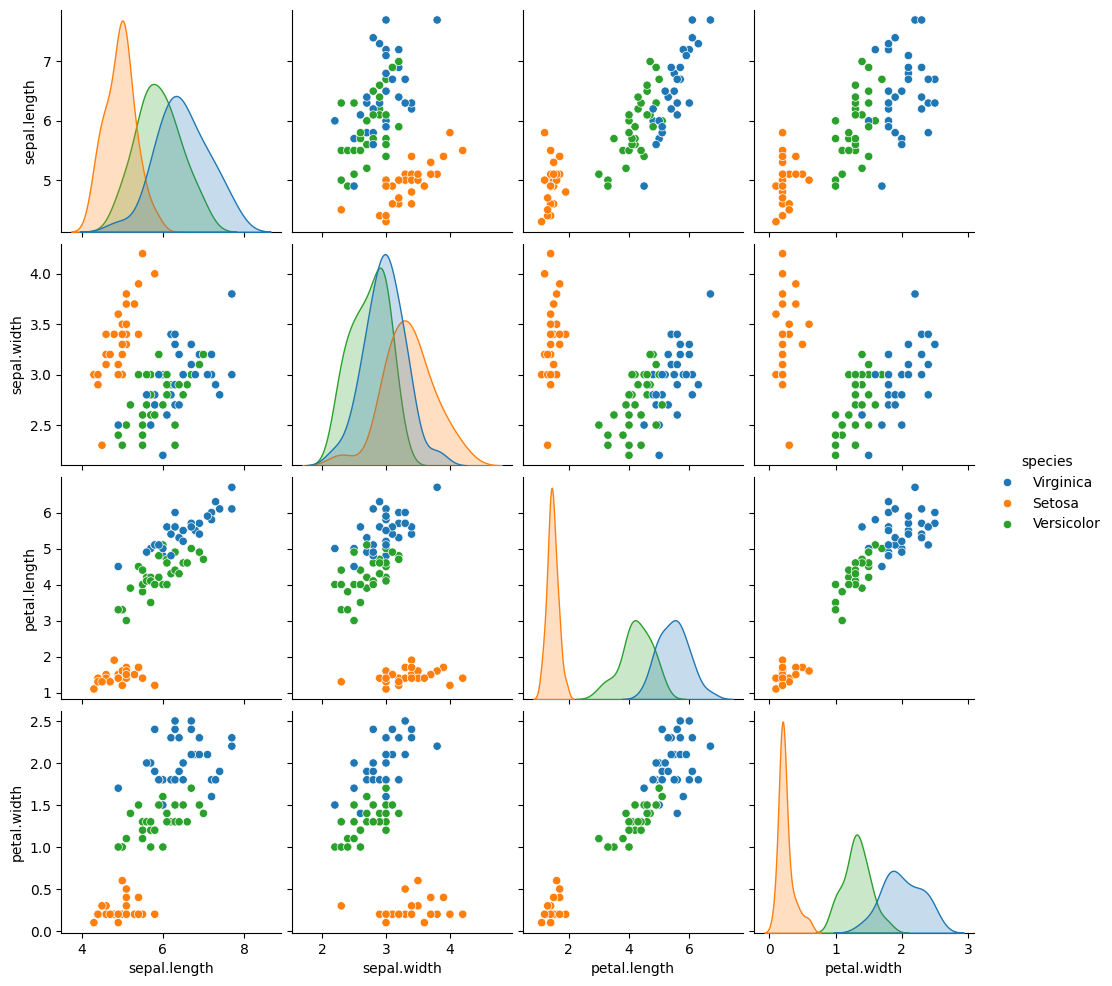

In [ ]:
import seaborn as sns

# Add the 'species' column back to the X_train dataset for pairplot
X_train_with_species = X_train.copy()
X_train_with_species['species'] = y_train

# Create pairplot
sns.pairplot(X_train_with_species, hue='species', height=2.5)
plt.show()

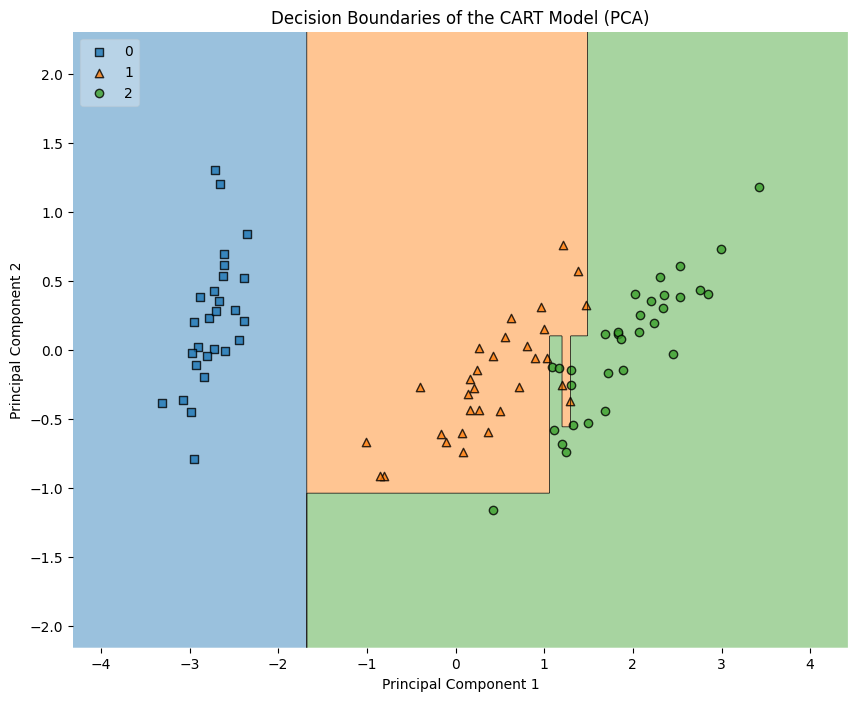

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions

# Fit PCA to the training data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Create a decision tree classifier for the PCA-transformed data
pca_cart_model = DecisionTreeClassifier(random_state=42)
pca_cart_model.fit(X_train_pca, y_train_int)

# Plot decision boundaries
plt.figure(figsize=(10, 8))
plot_decision_regions(X_train_pca, y_train_int.values, clf=pca_cart_model, legend=2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries of the CART Model (PCA)')
plt.show()
